# 0002 - Polinomial Regression Model

# I. Abstract
This notebook is all about create a polynomial regression model.
- First part, setup a random equation y=a.x^2 + b.x + c and detach it's outputs
- Second part, setup model and trying to figure it own weight and bias.

# II. Setup data for training

In [1]:
import torch
import torch.nn as nn

In [21]:
class DefinedModel(nn.Module):
    def __init__(self):
        super().__init__();
        self.a = torch.tensor(2.0, requires_grad=False)
        self.b = torch.tensor(1.5, requires_grad=False)
        self.c = torch.tensor(3.0, requires_grad=False)
        
    def forward(self,input):
        output = self.a * (input**2)  + (self.b * input) + self.c
        return output

In [31]:
x_input_list = torch.linspace(start=-10, end=10, steps=100)
definedModel = DefinedModel()
y_output_list = definedModel(x_input_list)

In [32]:
noise_list = torch.randint(low=-5, high=5, size=(len(x_input_list),))

In [33]:
y_output_noise_list = y_output_list + noise_list

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Polinomial Regression Dataset')

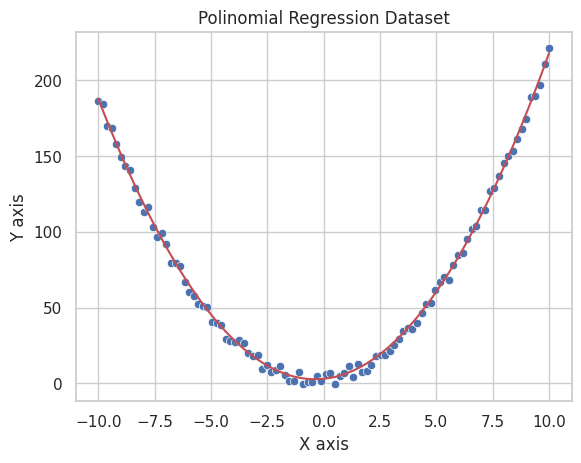

In [35]:
sns.set(style='whitegrid')
sns.lineplot(x=x_input_list, y= y_output_list, color='r')
sns.scatterplot(x=x_input_list, y=y_output_noise_list)
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.title("Polinomial Regression Dataset")